In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from pycm import ConfusionMatrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

In [2]:
dc = pd.read_csv('../input/clasificacion3.csv',index_col=0)
dc.head()

,PatientID,Pregnancies,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,rangos de glucosa
0,1354778,0,34,23,43.509726,1.213191,21,0,3
1,1147438,8,47,36,21.240576,0.158365,23,0,2
2,1640031,7,52,35,41.511523,0.079019,23,0,3
3,1883350,9,25,304,29.582192,1.282870,43,1,2
4,1424119,1,27,35,42.604536,0.549542,22,0,1


In [3]:
dc1=dc.head(10000)
dc2=dc.tail(5000)

In [4]:
columns = [col for col in dc1.columns if col not in ['rangos de glucosa','PatientID']]

X= dc1.loc[:,dc1.columns != "rangos de glucosa"]
y = dc1['rangos de glucosa'] 


In [5]:
#no me carga con todos los valores, uso 2000
#X=X.head(2000)
#y=y.head(2000)

In [6]:
X_train, X_test ,y_train ,y_test= train_test_split(X, y, test_size = 0.2)

In [7]:
y_test.shape

(2000,)

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [9]:
start = time.time() #calculo del tiempo

gnb = GaussianNB() #Clasificador (modelo)
fitting = gnb.fit(X_train,y_train) #Ajuste del modelo a los datos
y_pred = gnb.predict(X_test) #La predicción que te hace el modelo
    
acc = accuracy_score(y_test,y_pred) #Metrica que compara prediccion con realidad

In [10]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([3, 2, 1])

Confusion matrix, without normalization
[[  0   0 523]
 [  0   0 606]
 [  0   0 871]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


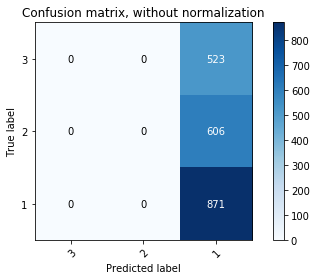

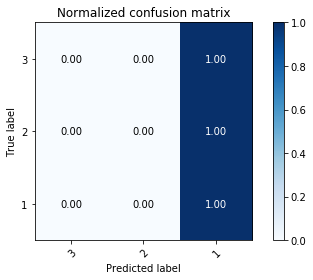

<Figure size 2160x1440 with 0 Axes>

In [11]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred,classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [12]:
acc

0.4355

In [13]:
start = time.time()
svc = SVC(kernel='rbf', gamma='scale')
fitting = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [14]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([3, 2, 1])

Confusion matrix, without normalization
[[  0   0 523]
 [  0   0 606]
 [  0   0 871]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


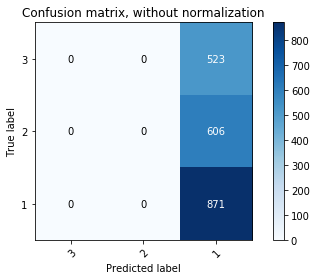

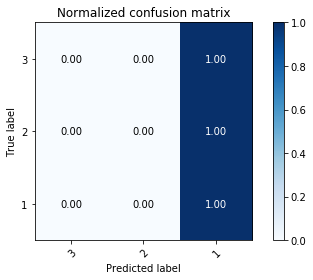

<Figure size 2160x1440 with 0 Axes>

In [15]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [16]:
 acc

0.4355

In [17]:
start = time.time()
kn = KNeighborsClassifier(n_neighbors=3)
fitting = kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
    
acc = accuracy_score(y_test,y_pred)

In [18]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([3, 2, 1])

Confusion matrix, without normalization
[[193 113 217]
 [248 131 227]
 [332 183 356]]
Normalized confusion matrix
[[0.37 0.22 0.41]
 [0.41 0.22 0.37]
 [0.38 0.21 0.41]]


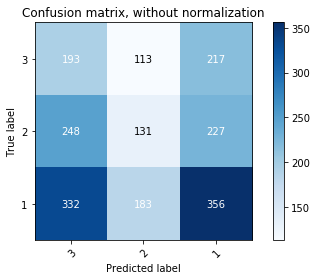

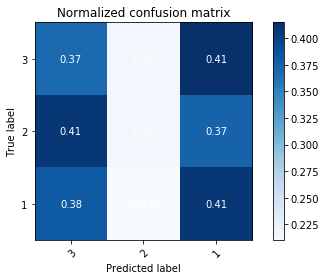

<Figure size 2160x1440 with 0 Axes>

In [19]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [20]:
acc

0.34

In [21]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100,random_state=0)
fitting = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
    
acc = accuracy_score(y_test,y_pred)

In [22]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([3, 2, 1])

Confusion matrix, without normalization
[[135  76 312]
 [ 95 146 365]
 [151 171 549]]
Normalized confusion matrix
[[0.26 0.15 0.6 ]
 [0.16 0.24 0.6 ]
 [0.17 0.2  0.63]]


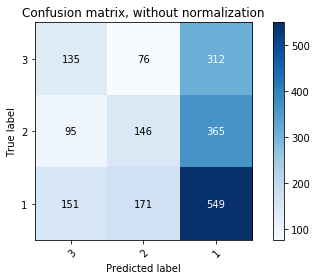

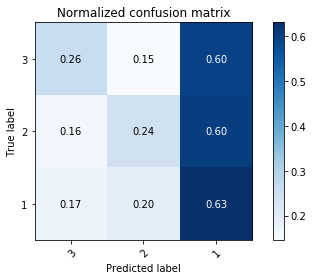

In [23]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.show()

In [24]:
acc

0.415

In [25]:
def plot_models(model):
    fig = plt.figure(figsize=(4,4))
    value = 1.5
    width = 0.75
    plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2, 
                      filler_feature_values={2: value, 3: value,
                                             4: value, 5: value, 6: value,7: value},
                      filler_feature_ranges={2: width, 3: width,
                                             4: width, 5: width, 6: width, 7: width})
    return plt.show()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


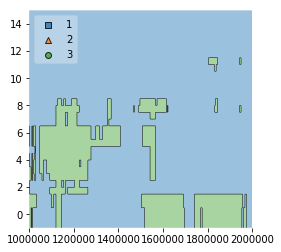

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


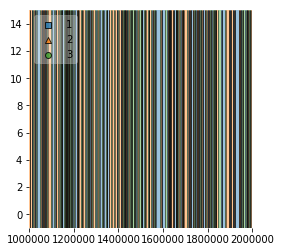

GaussianNB(priors=None, var_smoothing=1e-09)


/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


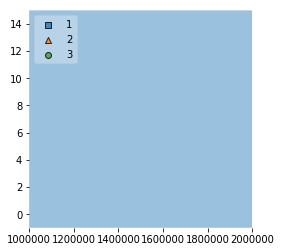

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


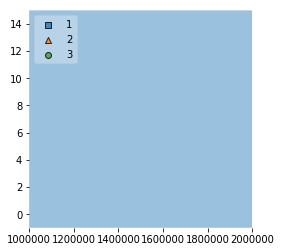

In [26]:
models= [rf,
         kn,
         gnb,
         svc
         ]
for model in models: 
    print(model)
    plot_models(model)

In [27]:
param_grid = {'n_estimators': [10, 100, 500], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [None,4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

rf = RandomForestClassifier(n_estimators=100,random_state=0)
fitting = rf.fit(X_test,y_test)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [32]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5,max_features= 'auto', criterion='gini')
fitting = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X,y)


0.4324

In [35]:
columns = [col for col in dc2.columns if col not in ['rangos de glucosa','PatientID']]

X2= dc2.loc[:,dc2.columns != "rangos de glucosa"]
y2 = dc2['rangos de glucosa']

In [36]:
y_demo = rf.predict(X2)

Confusion matrix, without normalization
[[   4    9 1312]
 [   2   19 1478]
 [   5   32 2139]]
Normalized confusion matrix
[[0.   0.01 0.99]
 [0.   0.01 0.99]
 [0.   0.01 0.98]]


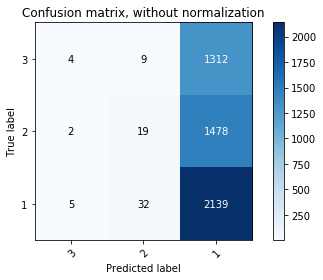

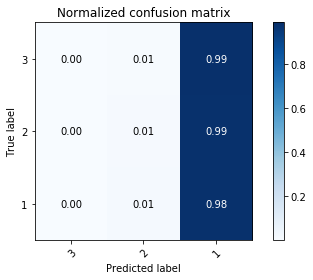

<Figure size 2160x1440 with 0 Axes>

In [37]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y2, y_demo, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y2, y_demo, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [ ]:
#Precision, Recall, F1_score

In [63]:
precision=precision_score(y2,y_demo, average='weighted')
precision

0.3801606803887936

In [64]:
recall=recall_score(y2,y_demo, average='weighted')
recall

0.4324

In [65]:
fl_s=f1_score(y2,y_demo, average='weighted')
fl_s

0.27093312074288095

In [66]:
metrics_df = pd.DataFrame({'Precision':precision,'Recall':recall,'F1-Score':fl_s}, index=['pred. glucosa'])
metrics_df

,Precision,Recall,F1-Score
pred. glucosa,0.380161,0.4324,0.270933
